(1) 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes

In [15]:
diabetes=load_diabetes()

df_x=diabetes.data
df_y=diabetes.target

print(df_x)
print(df_y)

print(df_x.shape)
print(df_y.shape)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

(2) 모델에 입력할 데이터 X 준비하기

In [10]:
import numpy as np

df_x=np.array(df_x)
print(df_x.shape)

(442, 10)


(3) 모델에 예측할 데이터 y 준비하기

In [11]:
df_x=np.array(df_y)
print(df_y.shape)

(442,)


(4) train 데이터와 test 데이터로 분리하기

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=151)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


(5) 모델 준비하기

In [18]:
len(diabetes.feature_names)

10

In [19]:
w=np.random.rand(10)
b=np.random.rand()

def model(x, w, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * w[i]
    predictions += b
    return predictions


(6) 손실함수 loss 정의하기

In [20]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

(7) 기울기를 구하는 gradient 함수 구현하기

In [21]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

(8) 하이퍼 파라미터인 학습률 설정하기

In [22]:
learning_rate=1

(9) 모델 학습하기

In [23]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(x_train, w, b, y_train)
    w -= learning_rate * dW
    b -= learning_rate * db
    L = loss(x_train, w, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28325.3429
Iteration 20 : Loss 27797.8471
Iteration 30 : Loss 27423.8378
Iteration 40 : Loss 27154.9942
Iteration 50 : Loss 26958.6093
Iteration 60 : Loss 26812.5060
Iteration 70 : Loss 26701.6125
Iteration 80 : Loss 26615.6546
Iteration 90 : Loss 26547.6003
Iteration 100 : Loss 26492.6120
Iteration 110 : Loss 26447.3390
Iteration 120 : Loss 26409.4411
Iteration 130 : Loss 26377.2663
Iteration 140 : Loss 26349.6330
Iteration 150 : Loss 26325.6833
Iteration 160 : Loss 26304.7826
Iteration 170 : Loss 26286.4524
Iteration 180 : Loss 26270.3238
Iteration 190 : Loss 26256.1063
Iteration 200 : Loss 26243.5658
Iteration 210 : Loss 26232.5100
Iteration 220 : Loss 26222.7778
Iteration 230 : Loss 26214.2321
Iteration 240 : Loss 26206.7545
Iteration 250 : Loss 26200.2415
Iteration 260 : Loss 26194.6020
Iteration 270 : Loss 26189.7552
Iteration 280 : Loss 26185.6287
Iteration 290 : Loss 26182.1577
Iteration 300 : Loss 26179.2837
Iteration 310 : Loss 26176.9541
Iteration 320 : L

(10) test 데이터에 대한 성능 확인하기

In [24]:
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse

26974.43306679847

(11) 정답 데이터와 예측한 데이터 시각화하기

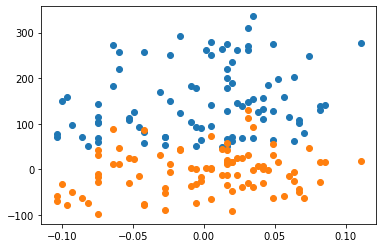

In [27]:
import matplotlib.pyplot as plt

plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()